In [17]:
import pandas as pd # usado para trabajar dataframes
import numpy as np # usado para trabajar arrays

import matplotlib.pyplot as plt # usado para graficos
import seaborn as sns # idem graficos (menos posibilidades de configuración pero gráficas más presentables)
  
from sklearn.model_selection import train_test_split # permite dividir el dataset
from sklearn.metrics import mean_squared_error, r2_score # permite obtener métricas

from scipy.stats import probplot # calcula cuantiles para una gráfica de probabilidad

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import RobustScaler
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline

########################################################################
# Probado OK

# Reemplazar los valores nulos con la mediana en una columna
def replace_null_with_median_column(df, column_name):
    imputer = SimpleImputer(strategy='median')
    df_column = df[column_name]
    df_column_filled = pd.DataFrame(imputer.fit_transform(df_column.values.reshape(-1, 1)), columns=[column_name])
    df_filled = df.copy()
    df_filled[column_name] = df_column_filled[column_name]
    return df_filled

# Reemplazar los valores nulos con la mediana en un df
def replace_null_with_median_df(df):
    imputer = SimpleImputer(strategy='median')
    numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
    df_numeric = df[numeric_cols]
    df_numeric_filled = pd.DataFrame(imputer.fit_transform(df_numeric), columns=df_numeric.columns)
    df_filled = df.copy()
    df_filled[numeric_cols] = df_numeric_filled
    return df_filled

########################################################################  
# Probado OK

# Escalar los valores numéricos en una columa
def scale_numeric_values_column(df, column_name):
    scaler = RobustScaler()
    column = df[column_name]
    column_scaled = scaler.fit_transform(column.values.reshape(-1, 1)).flatten()
    df_scaled = df.copy()
    df_scaled[column_name] = column_scaled
    return df_scaled

# Escalar los valores numéricos en un df
def scale_numeric_values_df(df):
    scaler = RobustScaler()
    numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
    df_numeric = df[numeric_cols]
    df_numeric_scaled = pd.DataFrame(scaler.fit_transform(df_numeric), columns=df_numeric.columns)
    df_scaled = df.copy()
    df_scaled[numeric_cols] = df_numeric_scaled
    return df_scaled

########################################################################
# Probado OK

# Codificar los valores categóricos en una columna
def encode_categorical_values_column(df, column_name):
    column = df[column_name]
    column_encoded = pd.get_dummies(column, prefix=column_name)
    df_encoded = pd.concat([df, column_encoded], axis=1)
    df_encoded.drop(column_name, axis=1, inplace=True)
    return df_encoded

# Codificar los valores categóricos en un df
def encode_categorical_values_df(df):
    categorical_cols = df.select_dtypes(include=['object']).columns
    df_encoded = pd.get_dummies(df, columns=categorical_cols)
    return df_encoded

########################################################################
# Probado OK

# Unir las 3 Funciones Juntas todo el df  
def transformar_df(df):

    # Aplicar las transformaciones en orden
    df_filled = replace_null_with_median_df(df)
    df_scaled = scale_numeric_values_df(df_filled)
    df_encoded = encode_categorical_values_df(df_scaled)
    return df_encoded

########################################################################

from google.colab import drive
drive.mount("/content/drive")
df = pd.read_csv("/content/drive/MyDrive/Datasets/airbnb_data.csv")
df.head()


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,price,latitude,longitude,property_type,room_type,accommodates,bathrooms,bedrooms,beds,minimum_nights,number_of_reviews,review_scores_rating,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,cancellation_policy
0,$350.00,38.880413,-76.990485,House,Entire home/apt,6,3.0,3.0,3.0,2,65,94.0,9.0,10.0,10.0,9.0,strict
1,$38.00,38.880105,-76.919031,House,Private room,2,1.5,1.0,1.0,2,1,100.0,10.0,10.0,10.0,10.0,moderate
2,$97.00,38.980067,-77.015538,House,Entire home/apt,4,1.5,2.0,2.0,4,5,88.0,9.0,10.0,10.0,9.0,moderate
3,$55.00,38.995938,-77.036141,Apartment,Entire home/apt,1,1.0,1.0,1.0,3,1,100.0,6.0,10.0,10.0,10.0,strict
4,$52.00,38.940709,-76.965705,House,Private room,2,1.0,1.0,1.0,1,1,80.0,8.0,10.0,10.0,10.0,flexible


In [18]:
df.isnull().sum()

price                            0
latitude                         0
longitude                        0
property_type                    0
room_type                        0
accommodates                     0
bathrooms                        0
bedrooms                         0
beds                             0
minimum_nights                   0
number_of_reviews                0
review_scores_rating           524
review_scores_cleanliness      530
review_scores_checkin          530
review_scores_communication    527
review_scores_location         527
cancellation_policy              0
dtype: int64

In [19]:
# Reemplaza Nullos por Mediana
df = replace_null_with_median_column(df, 'review_scores_rating')
df = replace_null_with_median_column(df, 'review_scores_cleanliness')
df = replace_null_with_median_column(df, 'review_scores_checkin')
df = replace_null_with_median_column(df, 'review_scores_communication')
df = replace_null_with_median_column(df, 'review_scores_location')

In [20]:
df.isnull().sum()

price                          0
latitude                       0
longitude                      0
property_type                  0
room_type                      0
accommodates                   0
bathrooms                      0
bedrooms                       0
beds                           0
minimum_nights                 0
number_of_reviews              0
review_scores_rating           0
review_scores_cleanliness      0
review_scores_checkin          0
review_scores_communication    0
review_scores_location         0
cancellation_policy            0
dtype: int64

In [21]:
df.select_dtypes(include=['object'])

,price,property_type,room_type,cancellation_policy
0,$350.00,House,Entire home/apt,strict
1,$38.00,House,Private room,moderate
2,$97.00,House,Entire home/apt,moderate
3,$55.00,Apartment,Entire home/apt,strict
4,$52.00,House,Private room,flexible
...,...,...,...,...
3317,$135.00,Apartment,Entire home/apt,strict
3318,$79.00,House,Private room,moderate
3319,$275.00,Apartment,Entire home/apt,strict
3320,$179.00,Apartment,Entire home/apt,moderate


In [22]:
# Analizamos y Corregimos la Columna "price" el Simbolo $
df.price = df.price.str.replace('$', '', regex=True)
df.price = df.price.astype('float')

In [23]:
df.select_dtypes(include=['object'])

,property_type,room_type,cancellation_policy
0,House,Entire home/apt,strict
1,House,Private room,moderate
2,House,Entire home/apt,moderate
3,Apartment,Entire home/apt,strict
4,House,Private room,flexible
...,...,...,...
3317,Apartment,Entire home/apt,strict
3318,House,Private room,moderate
3319,Apartment,Entire home/apt,strict
3320,Apartment,Entire home/apt,moderate


In [24]:
df.columns

Index(['price', 'latitude', 'longitude', 'property_type', 'room_type',
       'accommodates', 'bathrooms', 'bedrooms', 'beds', 'minimum_nights',
       'number_of_reviews', 'review_scores_rating',
       'review_scores_cleanliness', 'review_scores_checkin',
       'review_scores_communication', 'review_scores_location',
       'cancellation_policy'],
      dtype='object')

In [25]:
# Agrega y Borra Columnas de Categorias
df = encode_categorical_values_column(df, 'property_type')
df = encode_categorical_values_column(df, 'room_type')
df = encode_categorical_values_column(df, 'cancellation_policy')

df.columns

Index(['price', 'latitude', 'longitude', 'accommodates', 'bathrooms',
       'bedrooms', 'beds', 'minimum_nights', 'number_of_reviews',
       'review_scores_rating', 'review_scores_cleanliness',
       'review_scores_checkin', 'review_scores_communication',
       'review_scores_location', 'property_type_Apartment',
       'property_type_Bungalow', 'property_type_Cabin', 'property_type_House',
       'property_type_other', 'room_type_Entire home/apt',
       'room_type_Private room', 'room_type_Shared room',
       'cancellation_policy_flexible', 'cancellation_policy_moderate',
       'cancellation_policy_strict', 'cancellation_policy_super_strict_30'],
      dtype='object')

Outliers
q3=159.0, q1=85.0

LS=270.0, LI=-26.0



<Axes: xlabel='price'>

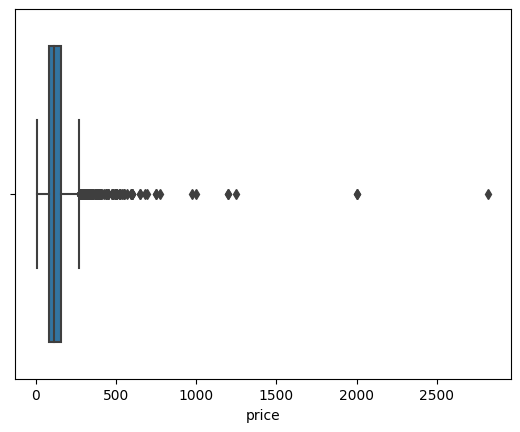

In [26]:
#Crear dataset 2 con outliers removidos
q3=df.price.quantile(0.75)
q1=df.price.quantile(0.25)

IQR = q3 - q1
LS = q3 + 1.5 * IQR
LI = q1 - 1.5 * IQR

print('Outliers')
print('q3=' + str(q3) + ', ' + 'q1=' + str(q1))
print('')
print('LS=' + str(LS) + ', ' + 'LI=' + str(LI))
print('')

sns.boxplot(data=df, x='price')

In [27]:
df2 = df[df.price <= 500]
df

,price,latitude,longitude,accommodates,bathrooms,bedrooms,beds,minimum_nights,number_of_reviews,review_scores_rating,...,property_type_Cabin,property_type_House,property_type_other,room_type_Entire home/apt,room_type_Private room,room_type_Shared room,cancellation_policy_flexible,cancellation_policy_moderate,cancellation_policy_strict,cancellation_policy_super_strict_30
0,350.0,38.880413,-76.990485,6,3.0,3.0,3.0,2,65,94.0,...,0,1,0,1,0,0,0,0,1,0
1,38.0,38.880105,-76.919031,2,1.5,1.0,1.0,2,1,100.0,...,0,1,0,0,1,0,0,1,0,0
2,97.0,38.980067,-77.015538,4,1.5,2.0,2.0,4,5,88.0,...,0,1,0,1,0,0,0,1,0,0
3,55.0,38.995938,-77.036141,1,1.0,1.0,1.0,3,1,100.0,...,0,0,0,1,0,0,0,0,1,0
4,52.0,38.940709,-76.965705,2,1.0,1.0,1.0,1,1,80.0,...,0,1,0,0,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3317,135.0,38.885492,-76.987765,4,1.0,1.0,2.0,3,19,99.0,...,0,0,0,1,0,0,0,0,1,0
3318,79.0,38.889401,-76.986646,2,2.0,1.0,1.0,3,36,94.0,...,0,1,0,0,1,0,0,1,0,0
3319,275.0,38.889533,-77.001010,6,1.0,2.0,3.0,2,12,94.0,...,0,0,0,1,0,0,0,0,1,0
3320,179.0,38.890815,-77.002283,2,1.0,1.0,1.0,2,48,96.0,...,0,0,0,1,0,0,0,1,0,0


In [28]:
# Correlacion

df2.corr()[['price']]

,price
price,1.000000
latitude,-0.116690
longitude,-0.050601
accommodates,0.616423
bathrooms,0.477493
bedrooms,0.576278
beds,0.530798
minimum_nights,0.027196
number_of_reviews,-0.066060
review_scores_rating,0.042445


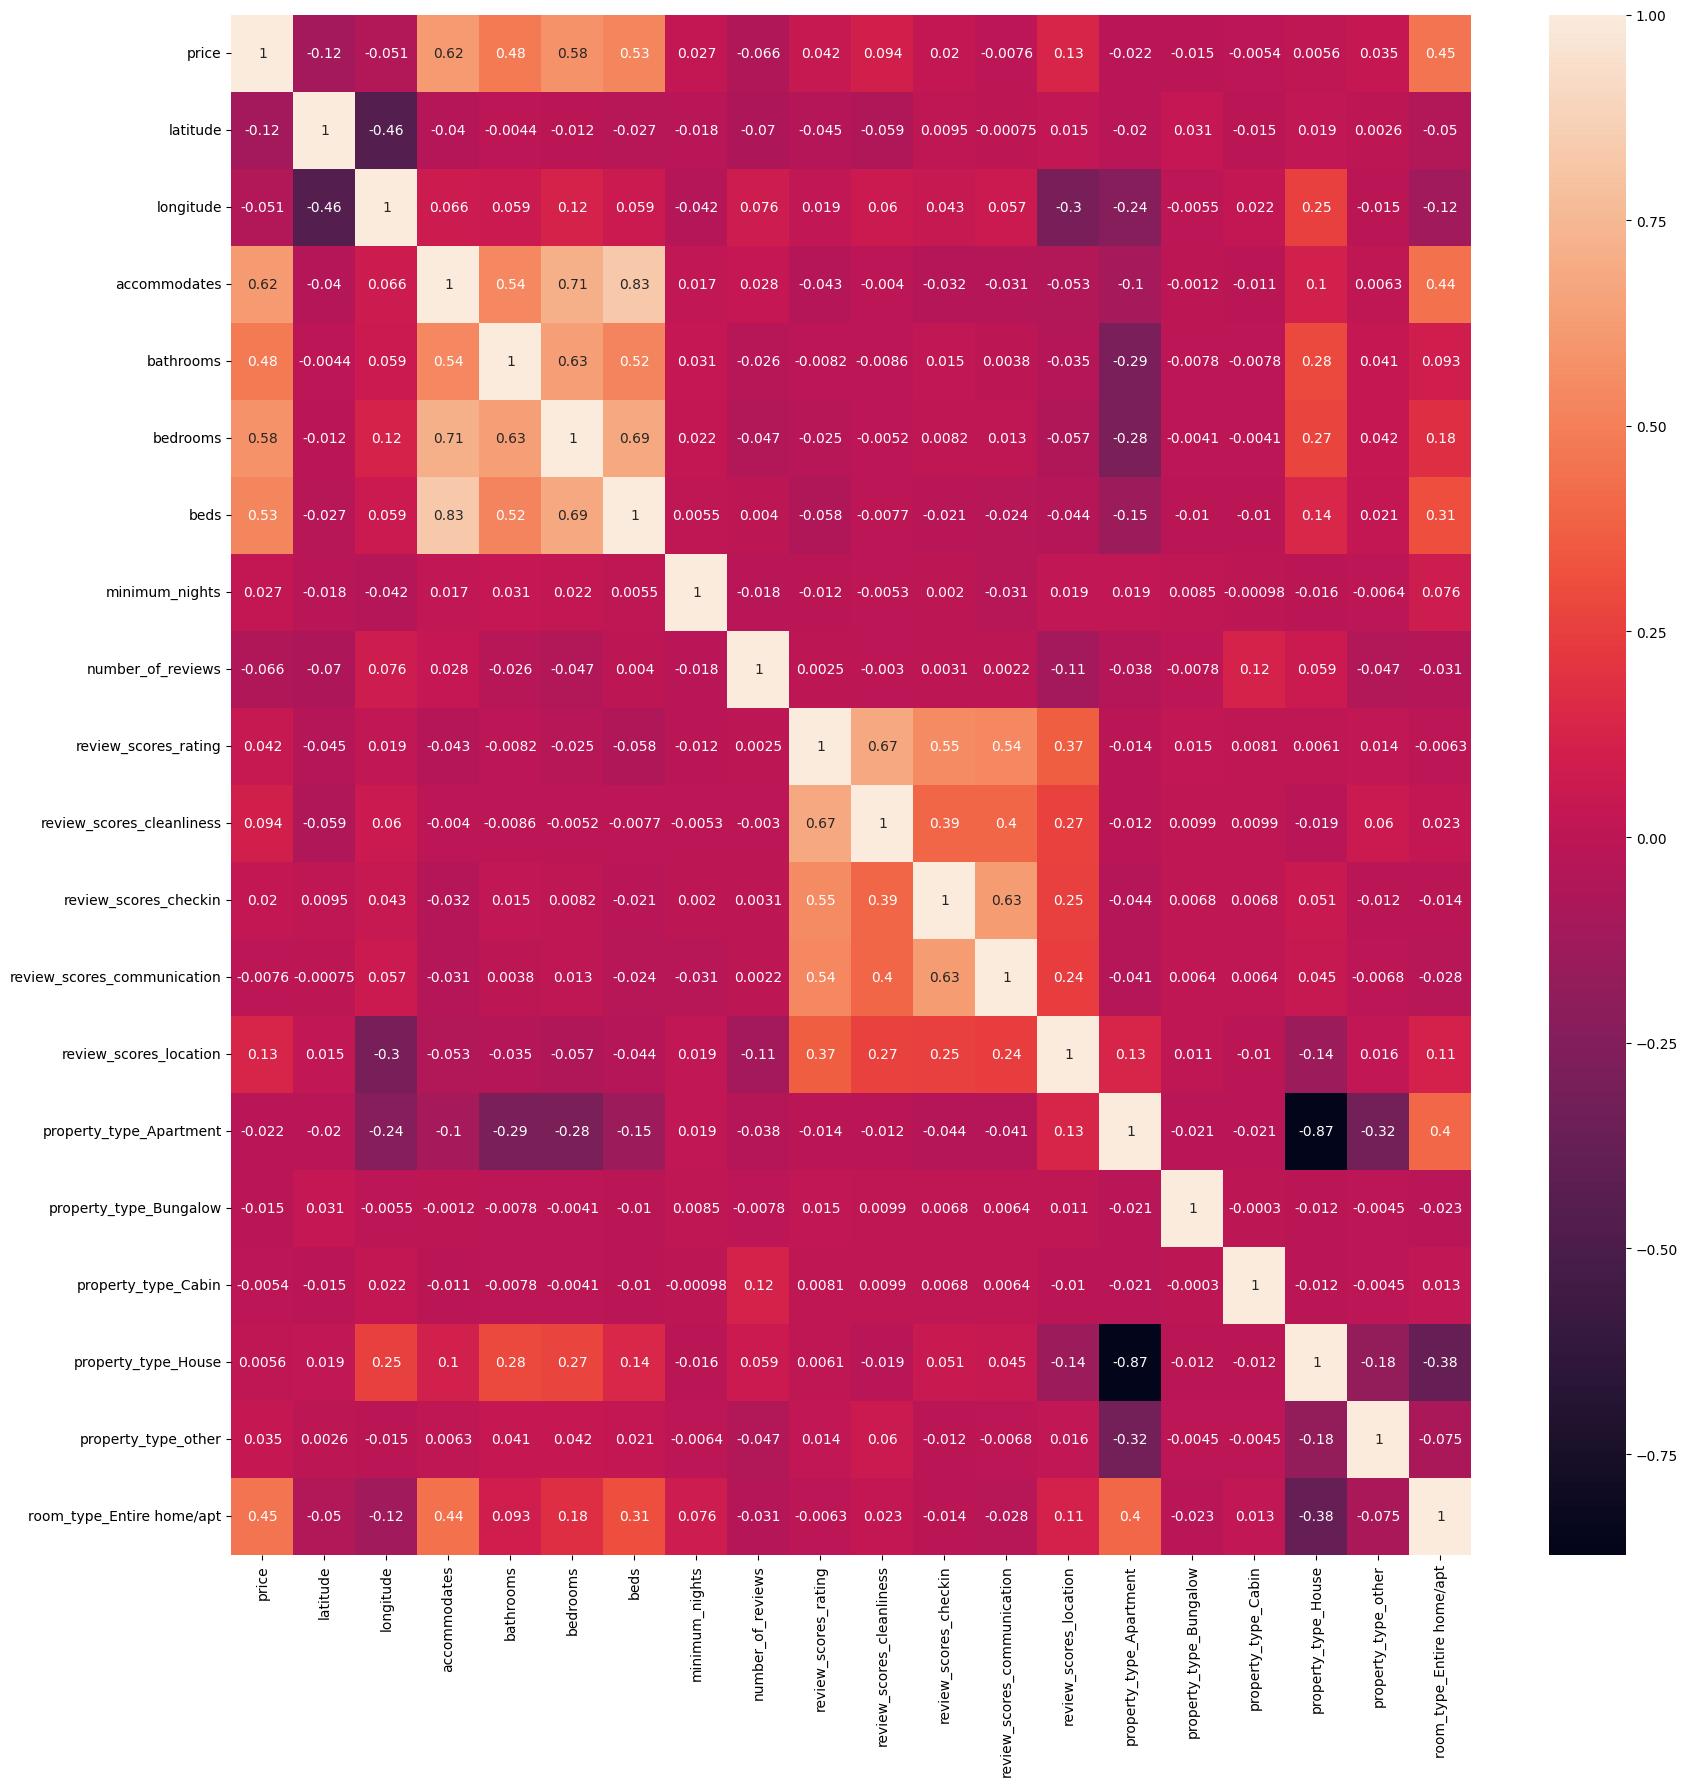

In [29]:
plt.figure(figsize=(20, 20))
sns.heatmap(df2.iloc[:,:20].corr(), annot=True, cbar='coolwarm')
plt.show()

Predicción 1: [6, 1, 2] => [212.33031843]

Valor de los coeficientes

Coeficientes de la función lineal:  [22.513 34.631 -0.059]
Ordenada en el origen (W0):  42.74017698356947

Métricas Performance del modelo en el set de entrenamiento

Error Cuadrático Medio (Mean Squared Error): 3581.812
Raíz del Error Cuadrático Medio (Root Mean Squared Error): 59.848
Coeficiente de Determinación (Coefficient of Determination): 0.420

Performance del modelo en el set de test

Error Cuadrático Medio (Mean Squared Error): 3507.551
Raíz del Error Cuadrático Medio (Root Mean Squared Error): 59.225
Coeficiente de Determinación (Coefficient of Determination): 0.418


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


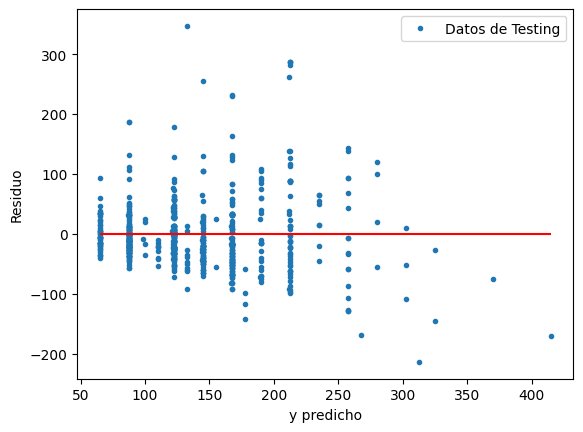

In [30]:
X = df2[['accommodates', 'room_type_Entire home/apt', 'minimum_nights']]
y = df2['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=33)

regressor = LinearRegression()

regressor.fit(X_train, y_train)

y_pred = regressor.predict(X_train)

y_pred_test = regressor.predict(X_test)

print('Predicción 1: [6, 1, 2] => ' + str(regressor.predict([[6, 1, 2]])))
print('')
print('Valor de los coeficientes')
print('')
print('Coeficientes de la función lineal: ', np.round_(regressor.coef_, decimals = 3))
print('Ordenada en el origen (W0): ', regressor.intercept_)
print('')
print('Métricas Performance del modelo en el set de entrenamiento')
print('')
print('Error Cuadrático Medio (Mean Squared Error): %.3f' % mean_squared_error(y_train, y_pred))
print('Raíz del Error Cuadrático Medio (Root Mean Squared Error): %.3f' % np.sqrt(mean_squared_error(y_train, y_pred)))
print('Coeficiente de Determinación (Coefficient of Determination): %.3f' % r2_score(y_train, y_pred))
print('')
print('Performance del modelo en el set de test')
print('')
print('Error Cuadrático Medio (Mean Squared Error): %.3f' % mean_squared_error(y_test, y_pred_test))
print('Raíz del Error Cuadrático Medio (Root Mean Squared Error): %.3f' % np.sqrt(mean_squared_error(y_test, y_pred_test)))
print('Coeficiente de Determinación (Coefficient of Determination): %.3f' % r2_score(y_test, y_pred_test))

#calcular los residuos
residues = y_test - y_pred_test

#Graficar los residuos. En el eje 'x' tenemos el precio predicho y en el eje 'y' los residuos
plt.plot(y_pred_test, residues, '.', label = 'Datos de Testing')
#Graficar una linea horizontal en el valor cero del eje y. 
plt.hlines(y=0, xmin=min(y_pred_test), xmax=max(y_pred_test), color = 'red')

#Agregar titulos a los ejes y leyenda 
plt.xlabel('y predicho')
plt.ylabel('Residuo')
plt.legend(loc='best')

Predicción 2: [6, 1, 2] => [218.07596778]

Valor de los coeficientes

Coeficientes de la función lineal:  [ 0.0000e+00  8.4460e+00 -4.8690e+00 -2.0530e+00 -4.0200e-01  1.8334e+01
  8.5000e-01 -4.8690e+00  8.3600e-01 -1.4000e-02]
Ordenada en el origen (W0):  73.88208913626764

Métricas Performance del modelo en el set de entrenamiento

Error Cuadrático Medio (Mean Squared Error): 3493.493
Raíz del Error Cuadrático Medio (Root Mean Squared Error): 59.106
Coeficiente de Determinación (Coefficient of Determination): 0.435

Performance del modelo en el set de test

Error Cuadrático Medio (Mean Squared Error): 3311.091
Raíz del Error Cuadrático Medio (Root Mean Squared Error): 57.542
Coeficiente de Determinación (Coefficient of Determination): 0.451


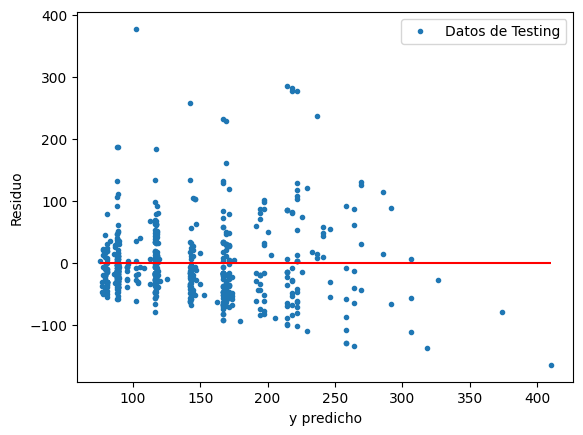

In [31]:
# Crear el objeto encargado de transformarme las entradas y elegir el grado del polinomio
poly = PolynomialFeatures(degree = 2)

# Transformar
X_train_poly = poly.fit_transform(X_train)

# Crear regresor 2
regressor2 = LinearRegression()

# Entrenar el modelo con los datos transformados de X_train
regressor2.fit(X_train_poly, y_train)

# Predecir con los datos de entrenamiento
y_pred_r2 = regressor2.predict(X_train_poly)

# Predecir con los datos de test. Tener en cuenta que primero debo transformar las entradas
X_test_poly = poly.fit_transform(X_test)
y_pred_test_r2 = regressor2.predict(X_test_poly)

print('Predicción 2: [6, 1, 2] => ' + str(regressor2.predict(poly.fit_transform([[6, 1, 2]]))))
print('')
print('Valor de los coeficientes')
print('')
print('Coeficientes de la función lineal: ', np.round_(regressor2.coef_, decimals = 3))
print('Ordenada en el origen (W0): ', regressor2.intercept_)
print('')
print('Métricas Performance del modelo en el set de entrenamiento')
print('')
print('Error Cuadrático Medio (Mean Squared Error): %.3f' % mean_squared_error(y_train, y_pred_r2))
print('Raíz del Error Cuadrático Medio (Root Mean Squared Error): %.3f' % np.sqrt(mean_squared_error(y_train, y_pred_r2)))
print('Coeficiente de Determinación (Coefficient of Determination): %.3f' % r2_score(y_train, y_pred_r2))
print('')
print('Performance del modelo en el set de test')
print('')
print('Error Cuadrático Medio (Mean Squared Error): %.3f' % mean_squared_error(y_test, y_pred_test_r2))
print('Raíz del Error Cuadrático Medio (Root Mean Squared Error): %.3f' % np.sqrt(mean_squared_error(y_test, y_pred_test_r2)))
print('Coeficiente de Determinación (Coefficient of Determination): %.3f' % r2_score(y_test, y_pred_test_r2))

#calcular los residuos
residues = y_test - y_pred_test_r2

#Graficar los residuos. En el eje 'x' tenemos el precio predicho y en el eje 'y' los residuos
plt.plot(y_pred_test_r2, residues, '.', label = 'Datos de Testing')
#Graficar una linea horizontal en el valor cero del eje y. 
plt.hlines(y=0, xmin=min(y_pred_test_r2), xmax=max(y_pred_test_r2), color = 'red')

#Agregar titulos a los ejes y leyenda 
plt.xlabel('y predicho')
plt.ylabel('Residuo')
plt.legend(loc='best')
